# 使用手寫辨識資料集, 觀察 PCA 算法
## [教學目標]
以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化 <br />
因為非監督模型的效果, 較難以簡單的範例看出來 <br />
所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果, <br />
同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分 <br />
## [範例重點]
以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 <br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [4]:
sgd = SGDClassifier(loss = 'log', penalty = 'l2', max_iter = 10000, tol = 1e-5, random_state = 0)
pca = PCA()
pipe = Pipeline(steps = [ ('pca', pca), ('sgd', sgd)])

digits = datasets.load_digits()
x = digits.data
y = digits.target

In [8]:
param_grid = {
    'pca__n_components' : [4, 10, 20, 30, 40, 50, 64],
    'sgd__alpha' : np.logspace(-4,4,5)
}

search = GridSearchCV(pipe, param_grid, iid = False, cv = 5, return_train_score = False)
search.fit(x,y)
print(f' Best params CV score = {search.best_score_}')
print(search.best_params_)

 Best params CV score = 0.9170293987672904
{'pca__n_components': 40, 'sgd__alpha': 1.0}


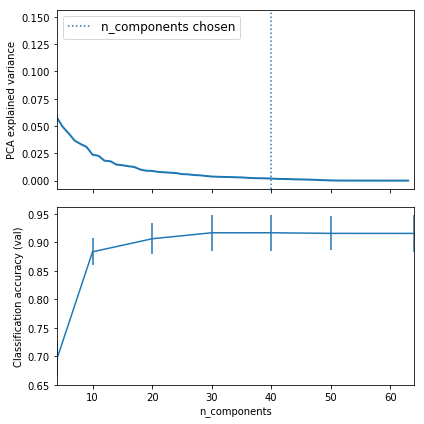

In [31]:
pca.fit(x)

fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'n_components chosen')
ax0.legend(prop = dict(size = 12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda x: x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x = components_col, y = 'mean_test_score', yerr = 'std_test_score', legend = False, ax = ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

# 作業
將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [32]:
logistic = SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 100, tol = 1e-5, random_state = 0)
pipe = Pipeline(steps = [('pca', pca), ('logistic', logistic)])

In [33]:
params =  {
    'pca__n_components' : [4,16,24,32,36,42,56,64],
    'logistic__alpha' : np.logspace(-5,2,5)
}

gs = GridSearchCV(pipe, params, iid = False, cv = 5, return_train_score = False)
gs.fit(x,y)
print(f'Best Params : {gs.best_params_}, Best Score : {gs.best_score_}')

Best Params : {'logistic__alpha': 1e-05, 'pca__n_components': 56}, Best Score : 0.9149089454789865


In [35]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=56, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.1...dom_state=0, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [40]:
results = pd.DataFrame(gs.cv_results_)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060419,0.008049,0.000706,0.000192,1e-05,4,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.739011,0.596685,0.690808,0.708683,0.721127,0.691263,0.049840,23
1,0.059144,0.004545,0.000875,0.000411,1e-05,16,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.925824,0.823204,0.913649,0.913165,0.853521,0.885873,0.040216,19
2,0.077616,0.011028,0.000879,0.000280,1e-05,24,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.936813,0.897790,0.922006,0.938375,0.878873,0.914771,0.023119,2
3,0.085758,0.009231,0.000837,0.000194,1e-05,32,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.920330,0.842541,0.927577,0.938375,0.895775,0.904920,0.034190,7
4,0.091221,0.005226,0.000665,0.000031,1e-05,36,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.931319,0.850829,0.894150,0.966387,0.892958,0.907128,0.039078,6
5,0.097388,0.012589,0.000812,0.000187,1e-05,42,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.917582,0.864641,0.933148,0.949580,0.898592,0.912708,0.029363,3
6,0.117160,0.006768,0.000661,0.000031,1e-05,56,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.923077,0.864641,0.938719,0.960784,0.887324,0.914909,0.034716,1
7,0.136330,0.013134,0.000776,0.000099,1e-05,64,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.909341,0.848066,0.938719,0.952381,0.876056,0.904913,0.038678,8
8,0.067419,0.011050,0.000663,0.000042,0.000562341,4,"{'logistic__alpha': 0.0005623413251903491, 'pc...",0.719780,0.577348,0.688022,0.700280,0.670423,0.671171,0.049593,24
9,0.079780,0.012432,0.000598,0.000036,0.000562341,16,"{'logistic__alpha': 0.0005623413251903491, 'pc...",0.934066,0.837017,0.908078,0.935574,0.856338,0.894215,0.040490,17


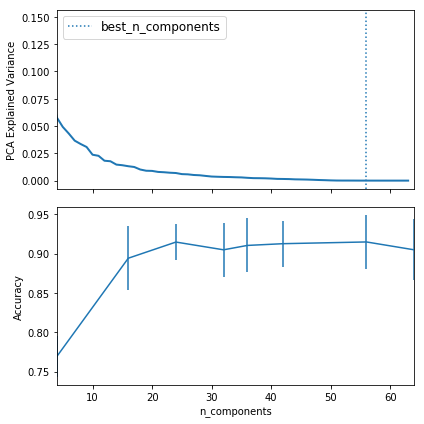

In [45]:
pca.fit(x)

fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA Explained Variance')

ax0.axvline(gs.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'best_n_components')
ax0.legend(prop = dict(size=12))

best_clfs = results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x = 'param_pca__n_components', y = 'mean_test_score', yerr = 'std_test_score', legend = False, ax = ax1)
ax1.set_xlabel('n_components')
ax1.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()